## Accès à la base de données sur l'éclairage depuis une API et importation du DataFrame

In [1]:
#pip install -r requirements.txt
import requests
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import geopandas as gpd
from shapely.geometry import Point
import folium
from IPython.display import display
from folium import Choropleth
from shapely.geometry import shape



/home/yasmine/.local/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/yasmine/.local/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [2]:
api_root_eclairage = "https://opendata.paris.fr/api/explore/v2.1/catalog/datasets/"
ID_eclairage = "eclairage-public"
url_api_eclairage = api_root_eclairage + ID_eclairage + "/exports/json" + "?select=cod_ouvrag,foyer,lib_domain,lib_ouvrag,posx_ouvra,posy_ouvra,lib_regime,voievent_v,numvoie_ou,nature_voi,lib_voie,lib_voiedo,lib_secteu,lib_region,lib_regi_1,geo_shape"
print(url_api_eclairage)

try:
    response = requests.get(url_api_eclairage)
    response.raise_for_status()
    wb = response.json()
except requests.exceptions.RequestException as e:
    print(f"Erreur lors de la requête : {e}")
except ValueError:
    print("Erreur : Impossible de décoder le JSON.")


df_eclairage_flt = pd.DataFrame(wb)
df_eclairage_flt.head()

https://opendata.paris.fr/api/explore/v2.1/catalog/datasets/eclairage-public/exports/json?select=cod_ouvrag,foyer,lib_domain,lib_ouvrag,posx_ouvra,posy_ouvra,lib_regime,voievent_v,numvoie_ou,nature_voi,lib_voie,lib_voiedo,lib_secteu,lib_region,lib_regi_1,geo_shape


,cod_ouvrag,foyer,lib_domain,lib_ouvrag,posx_ouvra,posy_ouvra,lib_regime,voievent_v,numvoie_ou,nature_voi,lib_voie,lib_voiedo,lib_secteu,lib_region,lib_regi_1,geo_shape
0,504626,1915783,Eclairage Public,Candélabre,655729.560484,6.865296e+06,HORAIRE EP,INDOCHINE (BOULEVARD D),A 25,BD,INDOCHINE (BOULEVARD D),VOIES PUBLIQUES,19_D'AMERIQUE,Arrondissement 19,STV Nord Est,"{'type': 'Feature', 'geometry': {'coordinates'..."
1,505158,1917345,Eclairage Public,Candélabre,655118.498707,6.866582e+06,HORAIRE EP,MACDONALD (BOULEVARD),F 70,BD,MACDONALD (BOULEVARD),VOIES PUBLIQUES,19_PONT DE FLANDRE,Arrondissement 19,STV Nord Est,"{'type': 'Feature', 'geometry': {'coordinates'..."
2,505164,1917322,Eclairage Public,Candélabre,655227.140834,6.866578e+06,HORAIRE EP,MACDONALD (BOULEVARD),O 57,BD,MACDONALD (BOULEVARD),VOIES PUBLIQUES,19_PONT DE FLANDRE,Arrondissement 19,STV Nord Est,"{'type': 'Feature', 'geometry': {'coordinates'..."
3,505264,1917641,Eclairage Public,Candélabre,654871.718989,6.866427e+06,HORAIRE EP,CORENTIN CARIOU (AVENUE),F 28,AV,CORENTIN CARIOU (AVENUE),VOIES PUBLIQUES,19_PONT DE FLANDRE,Arrondissement 19,STV Nord Est,"{'type': 'Feature', 'geometry': {'coordinates'..."
4,504843,1915957,Eclairage Public,Candélabre,655778.161495,6.865627e+06,HORAIRE EP,PORTE DE PANTIN (PLACE DE LA),None,PL,PORTE DE PANTIN (PLACE DE LA),VOIES PUBLIQUES,19_D'AMERIQUE,Arrondissement 19,STV Nord Est,"{'type': 'Feature', 'geometry': {'coordinates'..."


In [24]:
df_eclairage_flt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171226 entries, 0 to 171225
Data columns (total 18 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   cod_ouvrag  171226 non-null  object 
 1   foyer       171226 non-null  object 
 2   lib_domain  171226 non-null  object 
 3   lib_ouvrag  171226 non-null  object 
 4   posx_ouvra  171226 non-null  float64
 5   posy_ouvra  171226 non-null  float64
 6   lib_regime  171223 non-null  object 
 7   voievent_v  171226 non-null  object 
 8   numvoie_ou  100037 non-null  object 
 9   nature_voi  171226 non-null  object 
 10  lib_voie    171226 non-null  object 
 11  lib_voiedo  171226 non-null  object 
 12  lib_secteu  171226 non-null  object 
 13  lib_region  171226 non-null  object 
 14  lib_regi_1  171226 non-null  object 
 15  geo_shape   171226 non-null  object 
 16  num_region  171226 non-null  object 
 17  geometry    171226 non-null  object 
dtypes: float64(2), object(16)
memory usage: 23.5

## Statistiques descriptives 

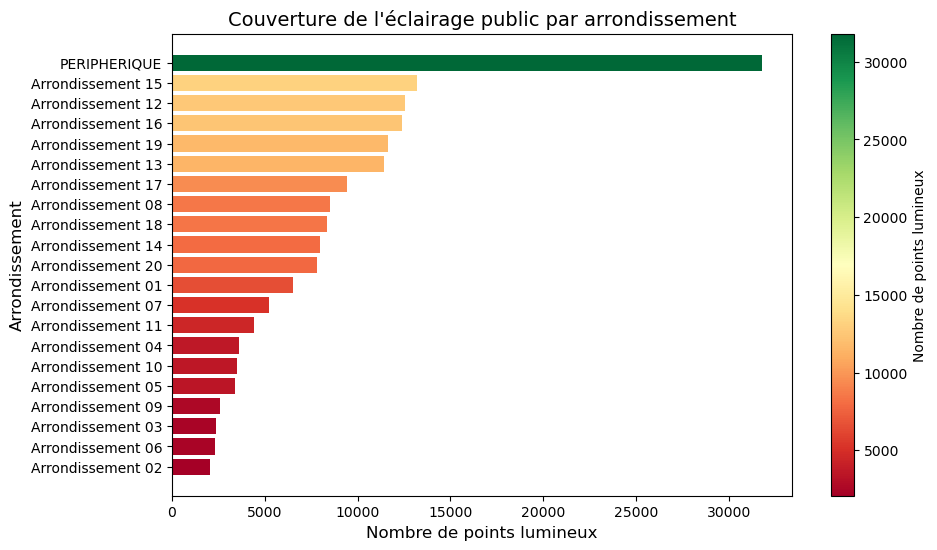

In [5]:
coverage_by_arrondissement = df_eclairage_flt['lib_region'].value_counts()
coverage_sorted = coverage_by_arrondissement.sort_values()
norm = mcolors.Normalize(vmin=coverage_sorted.min(), vmax=coverage_sorted.max())
cmap = plt.cm.RdYlGn
colors = [cmap(norm(value)) for value in coverage_sorted]
plt.figure(figsize=(10, 6))
plt.barh(coverage_sorted.index, coverage_sorted.values, color=colors)
plt.xlabel("Nombre de points lumineux", fontsize=12)
plt.ylabel("Arrondissement", fontsize=12)
plt.title("Couverture de l'éclairage public par arrondissement", fontsize=14)
plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), label="Nombre de points lumineux")
plt.show()


## Importation d'une base contenant les arrondissements de Paris depuis une API

In [3]:
url_api_arrondissements = "https://opendata.paris.fr/api/explore/v2.1/catalog/datasets/arrondissements/records?limit=20"
response2 = requests.get(url_api_arrondissements)
data = response2.json() 
results = data.get("results", []) 
df_arrondissements = pd.DataFrame(results)
df_arrondissements['c_arinsee']
#df_arrondissements.info()

0     75105
1     75110
2     75118
3     75107
4     75106
5     75109
6     75116
7     75111
8     75117
9     75112
10    75115
11    75120
12    75101
13    75103
14    75114
15    75119
16    75113
17    75102
18    75104
19    75108
Name: c_arinsee, dtype: int64

In [8]:
df_arrondissements_flt = df_arrondissements[['c_ar', 'l_ar', 'surface', 'geom']]
df_arrondissements_flt.loc[:, 'surface'] = df_arrondissements_flt['surface'] / 1e6
df_arrondissements_flt.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   c_ar     20 non-null     int64  
 1   l_ar     20 non-null     object 
 2   surface  20 non-null     float64
 3   geom     20 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 768.0+ bytes


## Réalisation d'une jointure avec la base d'éclairage

In [9]:
df_eclairage_flt['num_region'] = df_eclairage_flt['lib_region'].str.extract(r'(\d+)') 
df_eclairage_flt['num_region'] = df_eclairage_flt.apply(
    lambda row: "PERIPHERIQUE" if row['lib_region'] == "PERIPHERIQUE" else int(row['num_region']), axis=1
)
df_eclairage_flt[['lib_region', 'num_region']].head()
df_eclairage_flt.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171226 entries, 0 to 171225
Data columns (total 17 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   cod_ouvrag  171226 non-null  object 
 1   foyer       171226 non-null  object 
 2   lib_domain  171226 non-null  object 
 3   lib_ouvrag  171226 non-null  object 
 4   posx_ouvra  171226 non-null  float64
 5   posy_ouvra  171226 non-null  float64
 6   lib_regime  171223 non-null  object 
 7   voievent_v  171226 non-null  object 
 8   numvoie_ou  100037 non-null  object 
 9   nature_voi  171226 non-null  object 
 10  lib_voie    171226 non-null  object 
 11  lib_voiedo  171226 non-null  object 
 12  lib_secteu  171226 non-null  object 
 13  lib_region  171226 non-null  object 
 14  lib_regi_1  171226 non-null  object 
 15  geo_shape   171226 non-null  object 
 16  num_region  171226 non-null  object 
dtypes: float64(2), object(15)
memory usage: 22.2+ MB


In [29]:
df_combined = pd.merge(
    df_eclairage_flt[['geo_shape', 'num_region']],
    df_arrondissements_flt, 
    left_on='num_region',  
    right_on='c_ar',      
    how='inner'            
)
df_combined = df_combined.rename(columns={
    'surface': 'surface_arr',
    'geom': 'geom_arr'
})
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139424 entries, 0 to 139423
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   geo_shape    139424 non-null  object 
 1   num_region   139424 non-null  object 
 2   c_ar         139424 non-null  int64  
 3   l_ar         139424 non-null  object 
 4   surface_arr  139424 non-null  float64
 5   geom_arr     139424 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.4+ MB


## Représentation de la densité des points lumineux par arrondissement

In [11]:
coverage_by_arrondissement2 = df_combined['c_ar'].value_counts()
coverage_df = coverage_by_arrondissement2.reset_index()
coverage_df.columns = ['c_ar', 'Nombre_points_lumineux']

df_densite = pd.merge(
    df_arrondissements_flt,
    coverage_df,
    on='c_ar',
    how='left'  
)



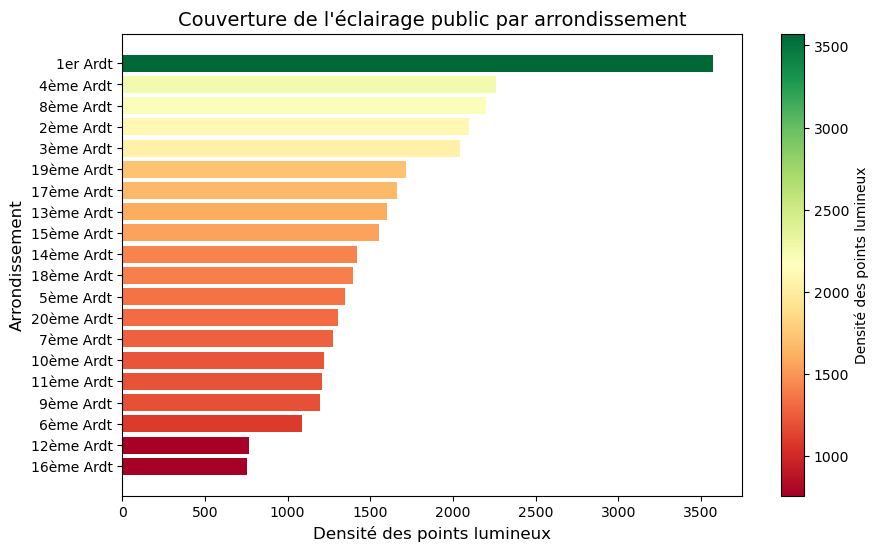

In [12]:
df_densite['densité_lum'] = df_densite['Nombre_points_lumineux'] / df_densite['surface']

coverage_sorted = df_densite.sort_values(by='densité_lum', ascending=True)
norm = mcolors.Normalize(vmin=coverage_sorted['densité_lum'].min(), vmax=coverage_sorted['densité_lum'].max())
cmap = plt.cm.RdYlGn  
colors = [cmap(norm(value)) for value in coverage_sorted['densité_lum']]

plt.figure(figsize=(10, 6))
plt.barh(coverage_sorted['l_ar'], coverage_sorted['densité_lum'], color=colors)
plt.xlabel("Densité des points lumineux", fontsize=12)
plt.ylabel("Arrondissement", fontsize=12)
plt.title("Couverture de l'éclairage public par arrondissement", fontsize=14)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm, label="Densité des points lumineux")

plt.show()


## Représentation sur une carte

In [14]:
!pip install folium
!pip install ipython
#pip install -r requirements.txt


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [15]:
df_eclairage_flt['geometry'] = df_eclairage_flt['geo_shape'].apply(lambda x: Point(x['geometry']['coordinates']))
gdf_eclairage = gpd.GeoDataFrame(df_eclairage_flt, geometry='geometry', crs="EPSG:4326")
gdf_eclairage_sample = gdf_eclairage.sample(frac=0.01) #Séléction aléatoire de 1% des données au vu de leur taille 

m = folium.Map(location=[48.8566, 2.3522], zoom_start=12)
for _, row in gdf_eclairage_sample.iterrows():
    folium.CircleMarker(
        location=[row.geometry.y, row.geometry.x],
        radius=0.5,
        color='yellow',
        fill=True,
        fill_color='yellow'
    ).add_to(m)

display(m)


In [16]:
df_densite['geometry'] = df_densite['geom'].apply(lambda x: shape(x['geometry']))
gdf_densite = gpd.GeoDataFrame(df_densite, geometry='geometry', crs="EPSG:4326")
Choropleth(
    geo_data=gdf_densite,
    data=gdf_densite,
    columns=["l_ar", "densité_lum"],  
    key_on="feature.properties.l_ar",  
    fill_color="RdYlGn",  
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Densité des points lumineux"
).add_to(m)

for _, row in gdf_densite.iterrows():
    folium.Popup(f"Arrondissement: {row['c_ar']}<br>Densité: {row['densité_lum']:.2f}").add_to(
        folium.GeoJson(row['geometry'])
    )

display(m)

